# Starter Notebook

## Importing Libraries

In [1]:

import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, Convolution2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.regularizers import l1, l2, l1_l2
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV3Small, InceptionV3, DenseNet201, Xception
# from keras.applications import 
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Initializing Parameters

In [3]:
# import os
# os.listdir('../input/tuberculosis-tb-chest-x-ray-cleaned-database/TB Chest Radiography Database/Partitioned Data/Cleaned Data')

In [4]:
IMAGE_SIZE = [256, 256, 3]
target_size = (256, 256)
Epochs = 500
Batch = 16

# train_path = 'Dataset/Shenzhen dataset/images/preprocessed data/a_preprocess/Train'
# test_path = 'Dataset/Shenzhen dataset/images/preprocessed data/a_preprocess/Test'
# val_path = 'Dataset/Shenzhen dataset/images/preprocessed data/a_preprocess/Validation'

# train_path = 'Dataset/Merge data/small gray dataset - Copy/Train'
# test_path = 'Dataset/Merge data/small gray dataset - Copy/Test'
# val_path = 'Dataset/Merge data/small gray dataset - Copy/Val'

# train_path = 'Dataset/icddr, b/Final png images/500,500 px/gray Dataset/init data - Copy/Train'
# test_path = 'Dataset/icddr, b/Final png images/500,500 px/gray Dataset/init data - Copy/Test'
# val_path ='Dataset/icddr, b/Final png images/500,500 px/gray Dataset/init data - Copy/Validation'


# train_path = 'Dataset/icddr, b/Final png images/500,500 px/gray Dataset/update init data/Train'
# test_path = 'Dataset/icddr, b/Final png images/500,500 px/gray Dataset/update init data/Test'
# val_path = 'Dataset/icddr, b/Final png images/500,500 px/gray Dataset/update init data/Validation'

train_path = 'Dataset/icddr, b/Final png images/500,500 px/gray Dataset/update preprocessed init data/Train'
test_path = 'Dataset/icddr, b/Final png images/500,500 px/gray Dataset/update preprocessed init data/Test'
val_path = 'Dataset/icddr, b/Final png images/500,500 px/gray Dataset/update preprocessed init data/Validation'

# train_path = 'Dataset/Shenzhen dataset/images/data/Train'
# test_path = 'Dataset/Shenzhen dataset/images/data/Test'
# val_path = 'Dataset/Shenzhen dataset/images/data/Validation'

# train_path = 'Dataset/icddr, b/Final png images/500,500 px/gray Dataset/init data/Train'
# test_path = 'Dataset/icddr, b/Final png images/500,500 px/gray Dataset/init data/Test'
# val_path = 'Dataset/icddr, b/Final png images/500,500 px/gray Dataset/init data/Validation'


## Data Augmentation

In [5]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255  # Normalize pixel values
)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = target_size,
                                                 batch_size = Batch,
                                                 class_mode = 'categorical')

val_set = test_datagen.flow_from_directory(val_path,
                                            target_size = target_size,
                                            batch_size = Batch,
                                            class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,                                            
                                            target_size = target_size,
                                            batch_size = Batch,
                                            class_mode = 'categorical',
                                           shuffle=False)

Found 140 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


## Setting Base Model

In [6]:
# base_model = DenseNet201(
#     weights='imagenet', include_top=False, input_shape=(256,256,3)
# )

base_model = Xception(weights='imagenet', include_top=False, input_shape=(256,256,3))


In [7]:
# for layer in base_model.layers:
#     layer.trainable = False
for layer in base_model.layers:
    layer.trainable = False

## Building Model

In [8]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 127, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

 block4_sepconv1_bn (BatchNorma  (None, 32, 32, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 32, 32, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 32, 32, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 32, 32, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 16, 16, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 16, 16, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 16, 16, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 16, 16, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 16, 16, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 16, 16, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 16, 16, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 16, 16, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 16, 16, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 16, 16, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

In [9]:
# model = Sequential()
# model.add(dense_model)
# # model.add(Convolution2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l1_l2(0.001)))
# # model.add(Convolution2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l1_l2(0.001)))
# model.add(Flatten())
# model.add(Dropout(0.2))
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation='relu'))
# #model.add(Dense(256, activation='relu'))
# model.add(Dense(2, activation='softmax'))

In [10]:
x = base_model.output
x = Flatten()(x)

x = Dropout(0.2)(x)

x = Dense(1024, activation='LeakyReLU')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(512, activation='LeakyReLU')(x)
x = BatchNormalization()(x)
# x = Dropout(0.2)(x)  # it made more complex

x = Dense(256, activation='LeakyReLU')(x)
x = Dense(128, activation='LeakyReLU')(x)
x = Dense(64, activation='LeakyReLU')(x)
prediction = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=prediction)

In [11]:
# '''kindda ok to provide'''

# # model = Sequential()
# # model.add(base_model)
# # # model.add(Convolution2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
# # # model.add(MaxPooling2D(2,2))
# # # model.add(BatchNormalization())

# # # model.add(Convolution2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
# # # model.add(MaxPooling2D(2,2))
# # # model.add(BatchNormalization())

# model.add(Flatten())

# model.add(Dropout(0.3))
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())
# model.add(Dense(512, activation='relu'))

# model.add(Dense(256, activation='relu'))
# model.add(Dense(2, activation='softmax'))

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 127, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

 block4_sepconv1_bn (BatchNorma  (None, 32, 32, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 32, 32, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 32, 32, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 32, 32, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 16, 16, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 16, 16, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 16, 16, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 16, 16, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 16, 16, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 16, 16, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 16, 16, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 16, 16, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 16, 16, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 16, 16, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

Total params: 155,783,786
Trainable params: 134,919,234
Non-trainable params: 20,864,552
__________________________________________________________________________________________________


## Optimization

In [13]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2)

early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

## Compiling Model

In [14]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## Training

In [15]:
history = model.fit(
    training_set,
    validation_data=val_set,
    epochs=40,
    callbacks=[reduce_lr, early]
)

Epoch 1/40
9/9 [==============================] - 13s 715ms/step - loss: 0.8563 - accuracy: 0.6571 - val_loss: 0.5419 - val_accuracy: 0.7000 - lr: 0.0100
Epoch 2/40
9/9 [==============================] - 4s 455ms/step - loss: 0.4155 - accuracy: 0.7857 - val_loss: 0.5771 - val_accuracy: 0.7000 - lr: 0.0100
Epoch 3/40
9/9 [==============================] - 4s 479ms/step - loss: 0.3636 - accuracy: 0.8286 - val_loss: 0.2953 - val_accuracy: 0.8667 - lr: 0.0100
Epoch 4/40
9/9 [==============================] - 4s 469ms/step - loss: 0.3513 - accuracy: 0.8500 - val_loss: 0.4215 - val_accuracy: 0.7667 - lr: 0.0100
Epoch 5/40
9/9 [==============================] - 4s 444ms/step - loss: 0.3705 - accuracy: 0.8571 - val_loss: 0.2643 - val_accuracy: 0.9000 - lr: 0.0100
Epoch 6/40
9/9 [==============================] - 4s 422ms/step - loss: 0.4313 - accuracy: 0.8143 - val_loss: 0.4391 - val_accuracy: 0.7333 - lr: 0.0100
Epoch 7/40
9/9 [==============================] - 4s 404ms/step - loss: 0.3464 - 

## Evaluating Model

In [16]:
print("Evaluating on test data ....")
results = model.evaluate(test_set, batch_size=Batch)
print("test loss, test acc:", results)

Evaluating on test data ....
2/2 [==============================] - 0s 166ms/step - loss: 0.1740 - accuracy: 0.9333
test loss, test acc: [0.17402274906635284, 0.9333333373069763]


## Saving History

## Plotting Curves

In [17]:
def plot(history):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].plot(history["loss"], "r-", history["val_loss"], "b-", linewidth=0.5)
    axes[0].set_title("Loss")
    axes[1].plot(history["accuracy"], "r-", history["val_accuracy"], "b-", linewidth=0.5)
    axes[1].set_title("Accuracy")
    fig.tight_layout()
    fig.show()

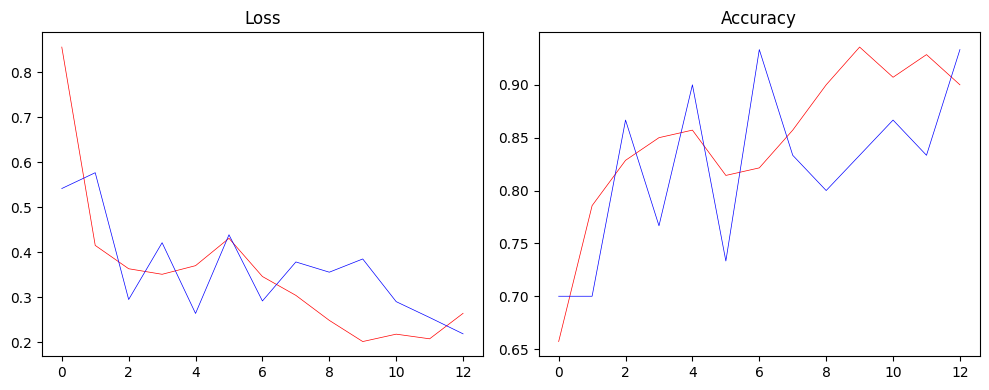

In [18]:
plot(history.history)

### Accuracy vs Epochs

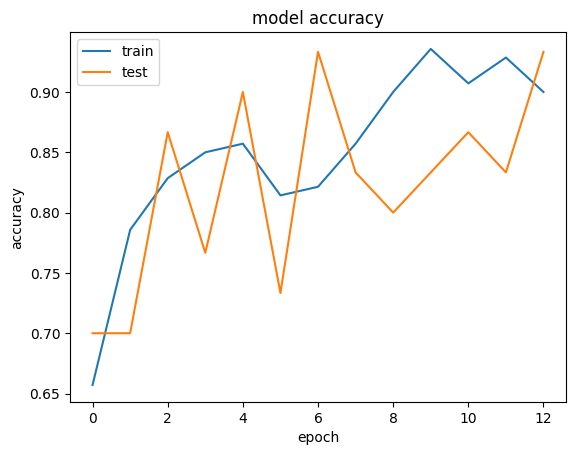

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Loss vs Epochs

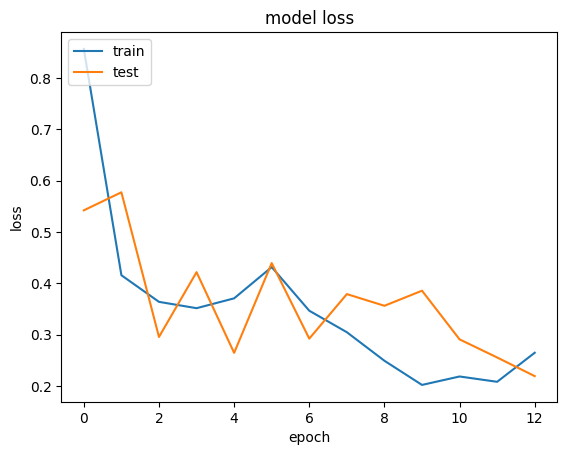

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Confusion Matrix

In [21]:
Y_pred = np.argmax(model.predict_generator(test_set), axis=1)
Y_test = test_set.classes

In [22]:
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : \n', cm)

Confusion Matrix : 
 [[15  0]
 [ 2 13]]


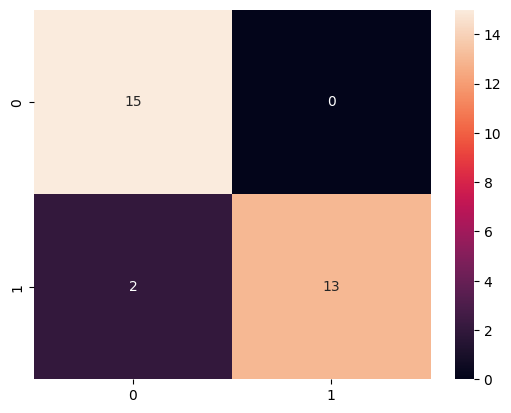

In [23]:
cm = sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True,fmt="d")

### Classification Report

In [24]:
print(classification_report(Y_test, Y_pred, target_names = ['colon_aca', 'colon_n']))

              precision    recall  f1-score   support

   colon_aca       0.88      1.00      0.94        15
     colon_n       1.00      0.87      0.93        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [25]:
from tensorflow.keras.preprocessing import image

img = image.load_img("TB5.bmp", target_size=(256,256))              
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array = img_array / 255.0  

In [26]:
pred = model.predict(img_array)
np.argmax(pred)

1/1 [==============================] - 1s 1s/step


0

In [27]:
np.argmax(pred)
# result = False

# if pred >= 0.5:
#     result = True

# result


0

### AUC-ROC

ROC AUC score: 0.9333333333333333


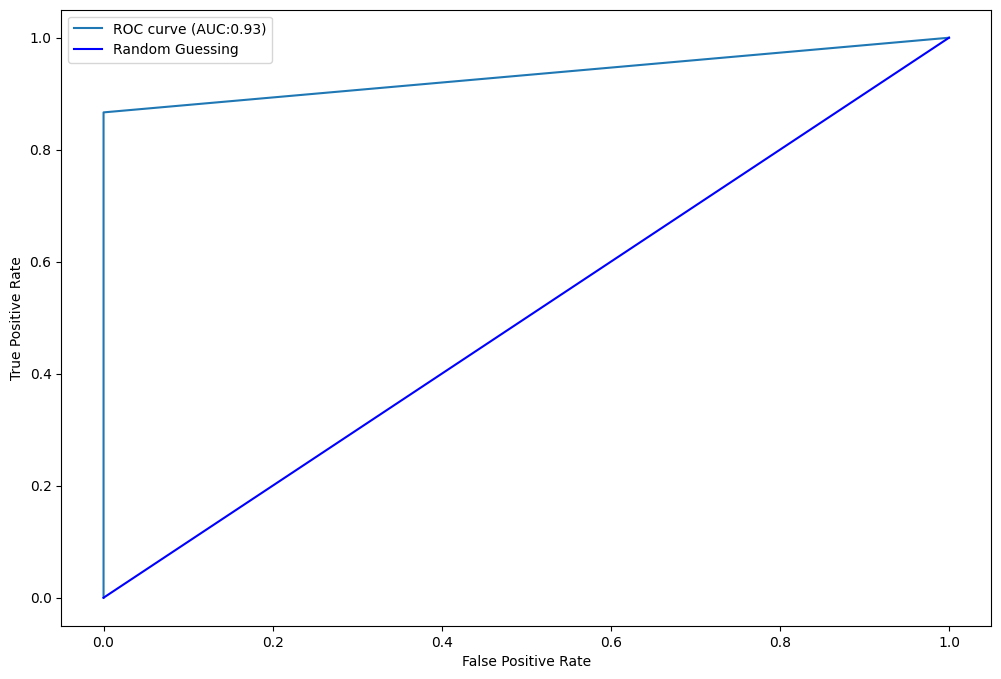

In [28]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['ROC curve']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(Y_test, Y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

### Curves with Seaborn Styling

In [29]:
import seaborn as sns
sns.set()

ROC AUC score: 0.9333333333333333


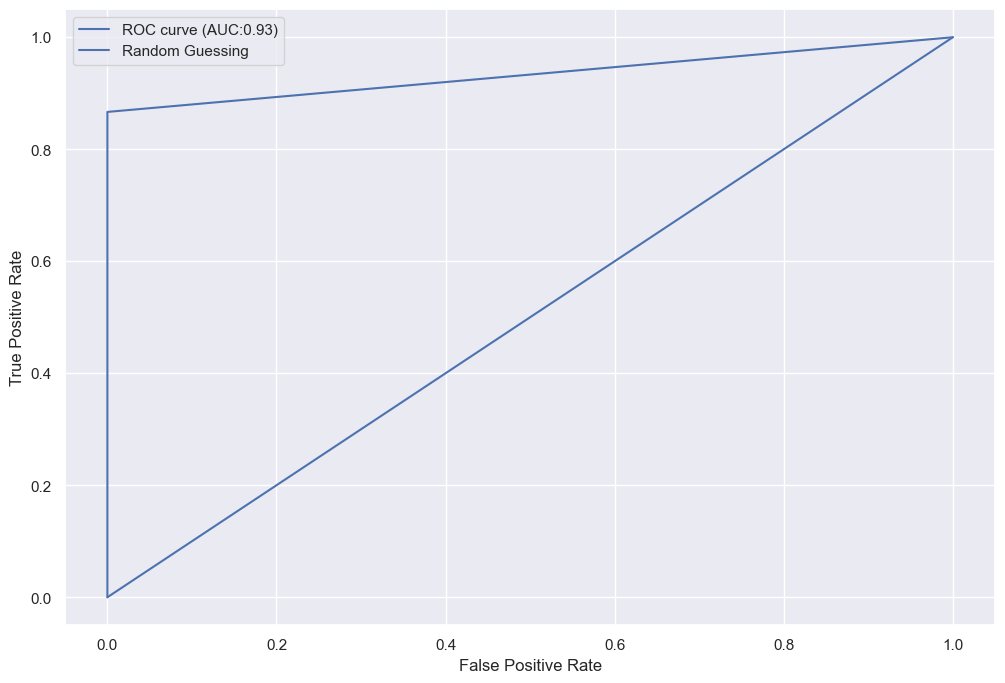

In [30]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['ROC curve']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(Y_test, Y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

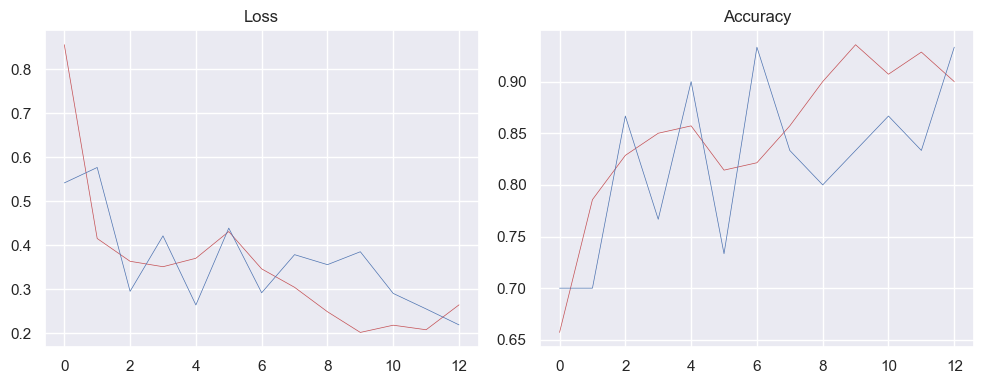

In [31]:
plot(history.history)

### Loss Accuracy Curve

In [32]:
# def display_training_curves(history, name, model_name, EPOCHS = epochs):
#     '''
#     Plots the training process
#     '''
#     fig, (ax1, ax2) = plt.subplots(2, figsize=(20,15))
#     fig.suptitle(model_name, size=20)
    
#     # plot AUC
#     ax1.plot(np.arange(EPOCHS),history.history['accuracy'],'-o',
#              label='train',color='#ff7f0e')
#     ax1.plot(np.arange(EPOCHS),history.history['val_accuracy'],'-o',
#              label='val',color='#1f77b4')
#     x = np.argmax(history.history['val_accuracy']); y = np.max(history.history['val_accuracy'])
#     xdist = plt.xlim()[1] - plt.xlim()[0]; ydist = plt.ylim()[1] - plt.ylim()[0]
#     ax1.scatter(x,y,s=200,color='#1f77b4')
#     ax1.text(x-0.03*xdist,y-0.05*ydist,'max accuracy\n%.2f'%y,size=14)
#     ax1.set_ylabel('Accuracy',size=14); ax1.set_xlabel('Epoch',size=14)
#     ax1.set_title('Accuracy')
#     ax1.set_xticks(list(range(EPOCHS)))
#     ax1.set_xticklabels(list(range(1, EPOCHS+1)))
#     ax1.legend(loc=2)

#     #  plot loss
#     ax2.plot(np.arange(EPOCHS),history.history['loss'],'-o',
#               label='Train Loss',color='#2ca02c')
#     ax2.plot(np.arange(EPOCHS),history.history['val_loss'],'-o',
#               label='Val Loss',color='#d62728')
#     x = np.argmin(history.history['val_loss'] )
#     y = np.min(history.history['val_loss'] )
#     ydist = plt.ylim()[1] - plt.ylim()[0]
#     ax2.scatter(x,y,s=200,color='#d62728')
#     ax2.text(x-0.03*xdist,y+0.05*ydist,'min loss',size=14)
#     ax2.set_ylabel('Loss',size=14); ax2.set_xlabel('Epoch',size=14)
#     ax2.set_title('Loss')
#     ax2.set_xticks(list(range(EPOCHS)))
#     ax2.set_xticklabels(list(range(1, EPOCHS+1)))
#     ax2.legend(loc=3)
#     plt.savefig(name + '.png')
#     plt.show() 

In [33]:
# display_training_curves(history, 'name', 'Loss-Accuracy Curve')

In [34]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to the folder containing images
folder_path = 'ForTest/'

# List all files in the folder
image_files = os.listdir(folder_path)

for file_name in image_files:
    # Construct the complete file path
    file_path = os.path.join(folder_path, file_name)
    
    # Load and preprocess each image
    img = image.load_img(file_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
    img_array = img_array / 255.0  # Normalize
    
    # Perform further processing or prediction with the img_array
    # Example: model.predict(img_array) if you have a model for predictions
    print(file_name)
    pred = model.predict(img_array)
    
    if np.argmax(pred)==0:
        print("\t Tuberculosis Negative")
    else:
        print("\t Tuberculosis positive")


NORMAL1.png
1/1 [==============================] - 0s 36ms/step
	 Tuberculosis Negative
NORMAL10.png
1/1 [==============================] - 0s 32ms/step
	 Tuberculosis Negative
NORMAL11.png
1/1 [==============================] - 0s 32ms/step
	 Tuberculosis Negative
NORMAL2.png
1/1 [==============================] - 0s 36ms/step
	 Tuberculosis Negative
NORMAL3.png
1/1 [==============================] - 0s 36ms/step
	 Tuberculosis Negative
NORMAL4.png
1/1 [==============================] - 0s 32ms/step
	 Tuberculosis positive
NORMAL5.png
1/1 [==============================] - 0s 32ms/step
	 Tuberculosis Negative
NORMAL6.png
1/1 [==============================] - 0s 32ms/step
	 Tuberculosis Negative
NORMAL7.png
1/1 [==============================] - 0s 32ms/step
	 Tuberculosis Negative
NORMAL8.png
1/1 [==============================] - 0s 32ms/step
	 Tuberculosis Negative
NORMAL9.png
1/1 [==============================] - 0s 32ms/step
	 Tuberculosis Negative
TB1.bmp
1/1 [=================